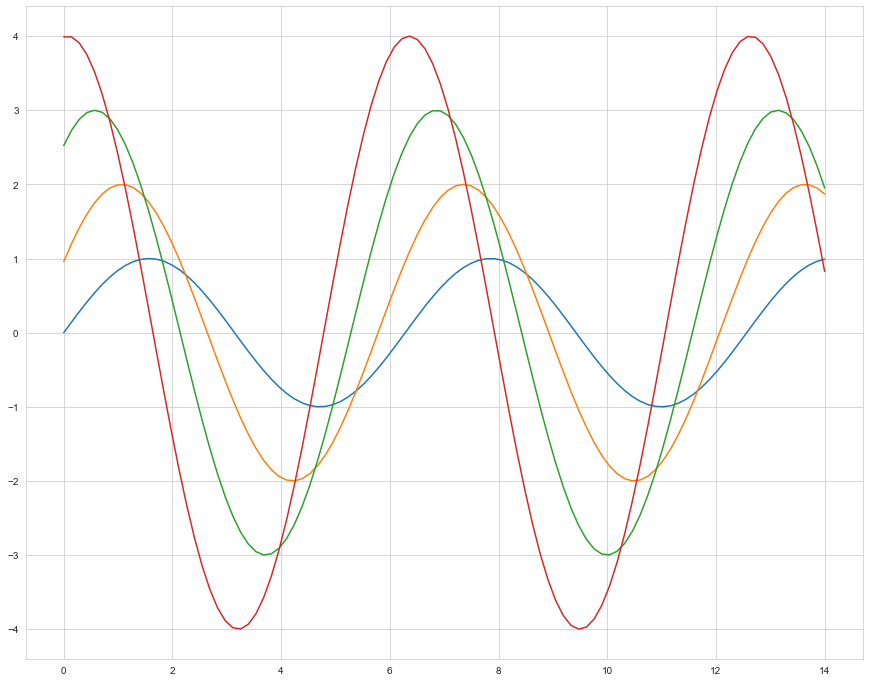

In [12]:
''' 좀 더 편리한 시각화 도구. Seaborn 
Matplotlib와 함께 사용하는 것인데 정말 괜찮습니다. 
seaborn을 import할 때는 matplotlib도 같이 import 되어 있어야 합니다. '''

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

x = np.linspace(0, 14, 100)
y1 = np.sin(x)

y2 = 2 * np.sin(x + 0.5 )
y3 = 3 * np.sin(x + 1.0 )
y4 = 4 * np.sin(x + 1.5 )

plt.figure ( figsize = (15,12 ))
sns.set_style('whitegrid')
plt.plot(x,y1 , x,y2, x,y3, x,y4)
plt.show()

In [18]:
''' 글고 Seaborn은 연습할 만할 데이터 셋을 몇 개 가지고 있습니다.
붓꽃 데이터, 타이타닉호 데이터, 팁 데이터, 여객운송 데이터
'''
# 1. 요일별 점심, 저녁, 흡연 여부, 식사 금액과 팁을 정리한 데이터
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


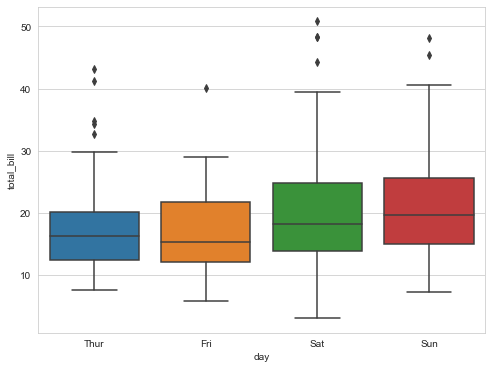

In [19]:
plt.figure (figsize = (8,6))
sns.boxplot( x = 'day', y = 'total_bill', data = tips) 
# http://seaborn.pydata.org/generated/seaborn.boxplot.html 파라미터 설명서들
''' data에는 가져올 DataFrame, array 등이 들어가는데, 이걸 해 놓고 y = 'total_bill'로 해 놓으면
비교대상을 total_bill로만 보겠다는 거지
'''
plt.show()

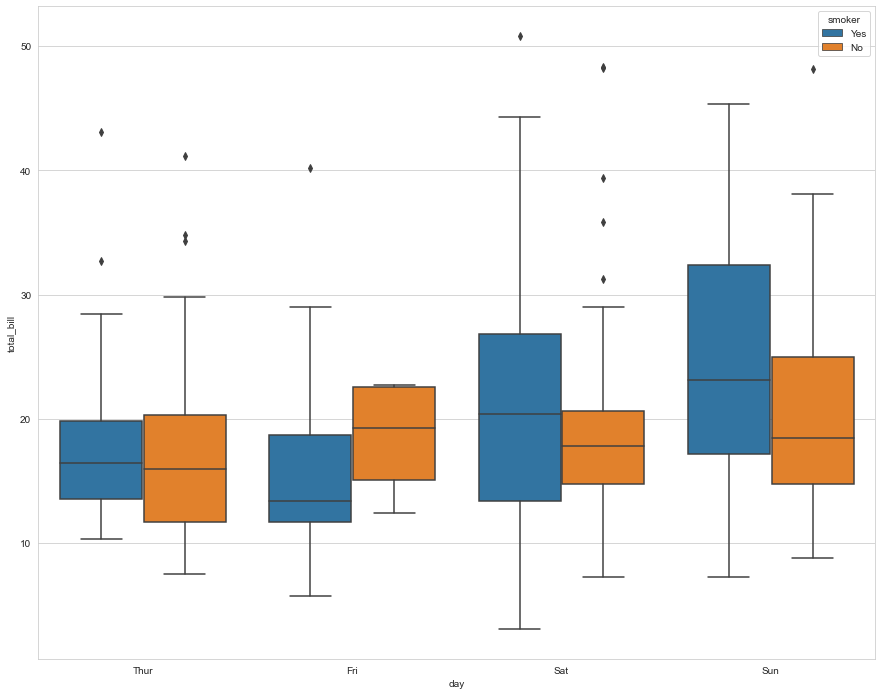

In [21]:
plt.figure( figsize = (15,12))
sns.boxplot( x = 'day' , y = 'total_bill' , hue = 'smoker', data = tips, palette = 'Set3' )
''' hue 옵션을 이용해서, smoker 같은 binary 옵션이 있을 때는 구분할 수 있습니다. 
palette 는 그냥 색깔 옵션이네요. '''

plt.show()

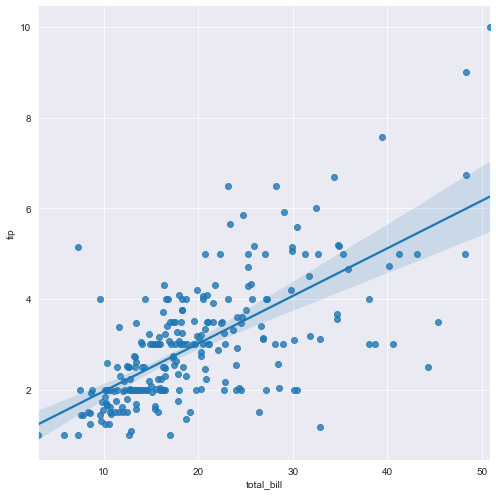

In [26]:
sns.set_style('darkgrid')
sns.lmplot(x= 'total_bill', y = 'tip' , data = tips, height = 7)
''' http://seaborn.pydata.org/generated/seaborn.lmplot.html 
lmplot은 데이터를 scatter처럼 그리고, polyfit으로 regression한 그림도 같이 그려주고, 유효범위도 ci로 잡아주는
괴물같은 놈이네요...
size는 height로 바뀌었답니다. '''
plt.show()

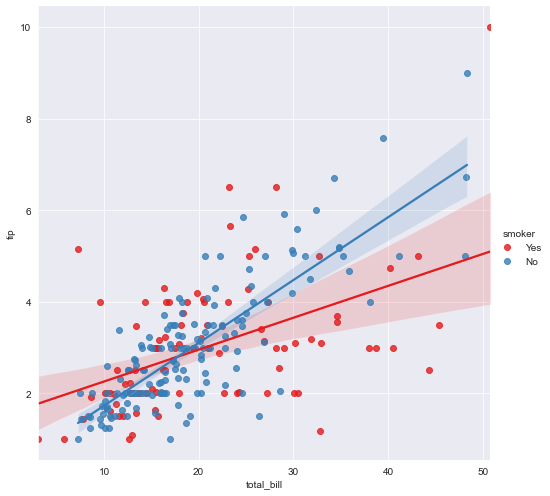

In [27]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker' , data = tips, palette = 'Set1', height = 7)
plt.show()

In [30]:
# 2. 항공기 승객수를 기록한 데이터
flights = sns.load_dataset('flights')
flights.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [32]:
''' pandas의 pivot 명령은
pivot('행 인덱스로 만들 열 이름', '열 인덱스로 만들 열 이름', '데이터로 쓸 열 이름')
pivot_table은 pivot_table( 데이터프레임, index = ['기준이', '되는', '열 그리고 얘는 행 인덱스가 됨'], 
values = ['데이터로 쓸 열'], 같은 index값이 있을 때 디폴트로 하면 평균을 내지만 다 합치고 싶다면
, aggfunc = np.sum)
'''

flights = flights.pivot('month', 'year', 'passengers')
flights.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


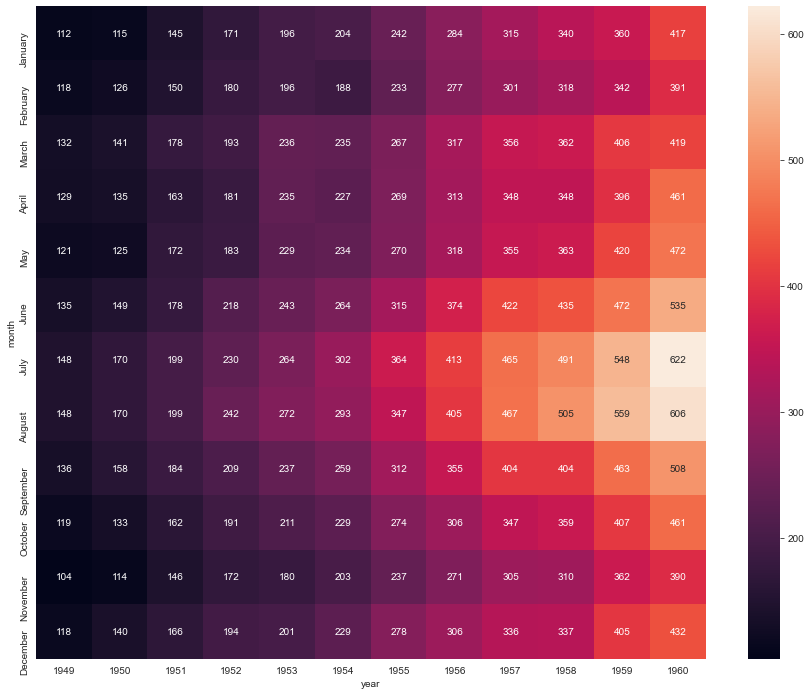

In [35]:
plt.figure ( figsize = (15,12))
''' Heatmap
x축과 y축에 2개의 범주형 자료의 계급별로 연속형 자료들이 있을 때
= x축, y축에 계급이 있고, 데이터가 연속형 자료일 때
x,y축 값에 따라 색깔을 다르게 해서 2차원으로 자료를 시각화
'''



sns.heatmap( flights, annot = True , fmt ='d' )
''' 아마 annotation을 의미하겠지? 칸 마다 숫자를 써준다고 
fmt는 integer format의 약자입니다. ='d' 라고 했으니 정수 형태로 숫자 입력하라는 뜻이다.
'''
plt.show()

In [36]:
''' 머신러닝에서 중요하게 다뤄지는 아이리스 꽃에 대한 데이터를 가져와봅시다.
꽃잎, 꽃받침의 너비의 폭을 가지고 그 조을 구분할 수 있는지 봐봅시다.
'''
sns.set(style = 'ticks')
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


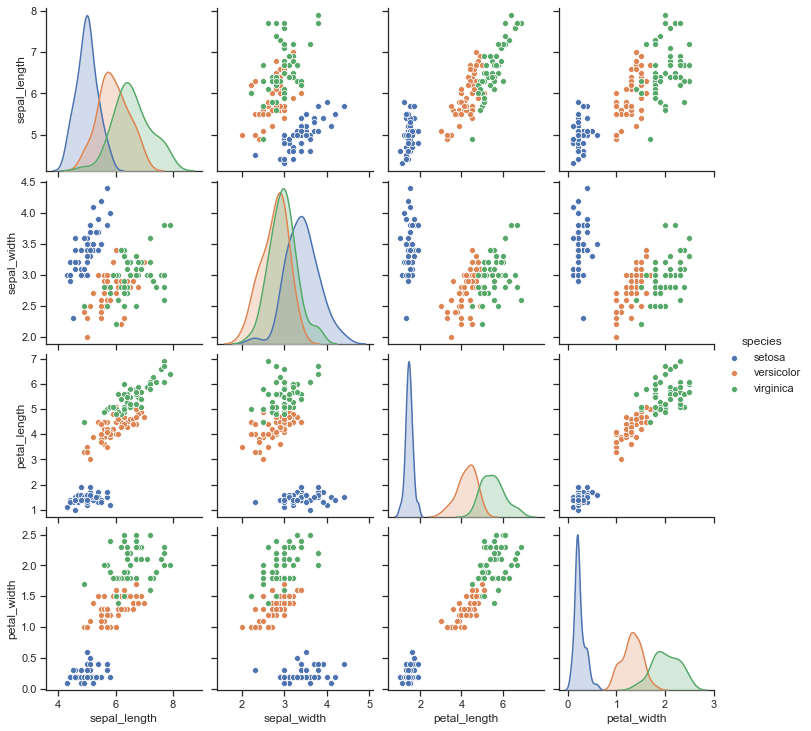

In [37]:
sns.pairplot(iris, hue= 'species')
''' 다차원 실수형 데이터 pairplot
DataFrame을 인수로 받아서 그립니다. 카테고리형 데이터가 섞여 있는 경우에는 hue인수에 변수를 지정해서 카테고리 값에 따라
색상을 다르게 할 수 있습니다.

대각선, 즉 같은 데이터가 만나는 영역에는 해당
'''




''' species로 구분한다는 말이지요? '''